In [1]:
import numpy as np
import effector

In [3]:
def generate_dataset(N, x1_min, x1_max, x2_sigma, x3_sigma):
    x1 = np.concatenate((np.array([0]),
                         np.random.uniform(0., 1., size=int(N)),
                         np.array([1])))
    x2 = np.random.normal(loc=x1, scale=x2_sigma)
    x3 = np.random.normal(loc=np.zeros_like(x1), scale=x3_sigma)
    x = np.stack((x1, x2, x3), axis=-1)
    return x

In [4]:
# define model

N = 500
x1_min = 0
x1_max = 1
x2_sigma = 0
x3_sigma = 0.5

# generate data
X = generate_dataset(N, x1_min, x1_max, x2_sigma, x3_sigma)
axis_limits = np.array([[0, 1],
                         [-4*x2_sigma, 1 + 4*x2_sigma],
                         [-4*x3_sigma, 4*x3_sigma]]).T



In [6]:
def predict(x):
    a1 = 1
    a2 = 1
    a = 0
    
    x = np.copy(x)
    x[:,0] = a1 * x[:,0]
    x[:,1] = a2 * x[:,1]

    # find indices
    ind1 = x[:,0] + x[:,1] < .5
    ind2 = np.logical_and(x[:,0] + x[:,1] >= 0.5, x[:,0] + x[:,1] < 1)

    # set values
    y = np.zeros_like(x[:,0])
    y[ind1] = x[ind1,0] + x[ind1,1]
    y[ind2] = .5 - x[ind2,0] - x[ind2,1]
    y += a * x[:, 0]*x[:, 2]
    return y

In [7]:
def predict_jac(x):
    a1 = 1
    a2 = 1
    a = 0
    
    x = np.copy(x)
    x[:,0] = a1 * x[:,0]
    x[:,1] = a2 * x[:,1]

    # find indices
    ind1 = x[:,0] + x[:,1] < .5
    ind2 = np.logical_and(x[:,0] + x[:,1] >= 0.5, x[:,0] + x[:,1] < 1)

    # set values
    y = np.zeros_like(x)

    # for df/dx1
    y[ind1, 0] = a1
    y[ind2, 0] = -a1
    y[:, 0] += a * x[:, 2]

    # for df/dx2
    y[ind1, 1] = a2
    y[ind2, 1] = -a2

    # for df/dx3
    y[:, 2] = a * x[:, 0]
    return y

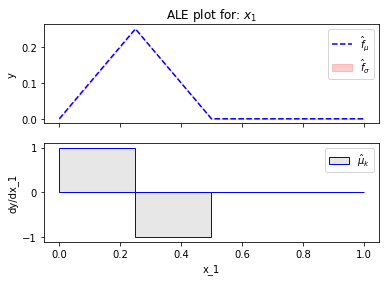

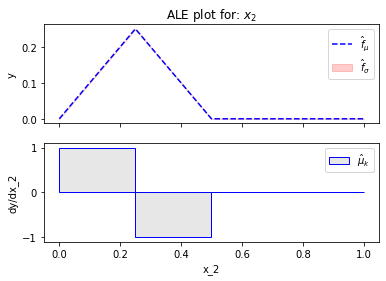

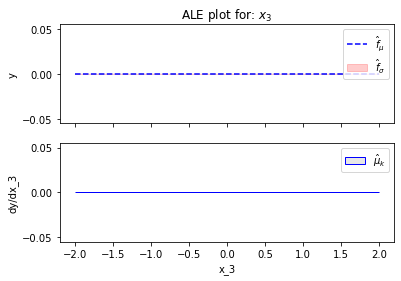

In [10]:
# RHALE
ale = effector.RHALE(data=X,
                      model=predict,
                      model_jac=predict_jac,
                      axis_limits=axis_limits)
binning = effector.binning_methods.DynamicProgramming(max_nof_bins=20, min_points_per_bin=10)
ale.fit(features="all", binning_method=binning)

for feat in range(3):
    ale.plot(feature=feat, uncertainty="std")




In [ ]:
# RHALE
dale = pythia.DALE(data=X,
                   model=model.predict,
                   model_jac=model.jacobian,
                   axis_limits=axis_limits)
binning = pythia.binning_methods.DynamicProgramming(max_nof_bins=20, min_points_per_bin=10)
dale.fit(features="all", binning_method=binning)
for feat in range(3):
    if savefig:
        pathname = os.path.join(path, "example_1", "dale_feat_" + str(feat) + ".pdf")
        dale.plot(feature=feat, confidence_interval="std", savefig=pathname, violin=True)
    else:
        dale.plot(feature=feat, confidence_interval="std", violin=True)

# PDP with ICE
pdp_ice = pythia.pdp.PDPwithICE(data=X,
                                model=model.predict,
                                axis_limits=axis_limits)
pdp_ice.fit("all", normalize=False)
for feat in range(3):
    if savefig:
        pathname = os.path.join(path, "example_1", "pdp_ice_feat_" + str(feat) + ".pdf")
        pdp_ice.plot(feature=feat, normalized=True, nof_points=300, savefig=pathname)
    else:
        pdp_ice.plot(feature=feat, normalized=True, nof_points=300)

# ICE std
pdp = pythia.PDP(data=X, model=model.predict, axis_limits=axis_limits)
pdp.fit("all", normalize=False)
xx = np.linspace(0, 1, 500)
for feat in range(3):
    y, std, stderr = pdp.eval(x=xx, feature=feat, uncertainty=True)
    plt.figure()
    plt.title("ICE standard deviation for feature " + str(feat))
    plt.plot(xx, std, "g", label="std")
    plt.xlabel("x_" + str(feat))
    plt.ylabel("standard deviation")
    if savefig:
        curpath = os.path.join(path, "example_1", "ice_std_" + str(feat) + ".pdf")
        plt.savefig(curpath, bbox_inches="tight")
    plt.show(block=False)

# dICE std
dpdp = pythia.pdp.dPDP(data=X, model=model.predict, model_jac=model.jacobian, axis_limits=axis_limits)
xx = np.linspace(0, 1, 500)
for feat in range(3):
    y, std, stderr = dpdp.eval(x=xx, feature=feat, uncertainty=True)
    plt.figure()
    plt.title("d-ICE standard deviation for feature " + str(feat))
    plt.plot(xx, std, "g", label="std")
    plt.xlabel("x_" + str(feat))
    plt.ylabel("standard deviation")
    if savefig:
        curpath = os.path.join(path, "example_1", "dice_std_" + str(feat) + ".pdf")
        plt.savefig(curpath, bbox_inches="tight")
    plt.show(block=False)
